In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

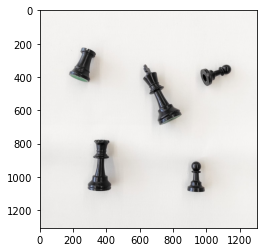

In [25]:
image = cv2.imread('image.jpeg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

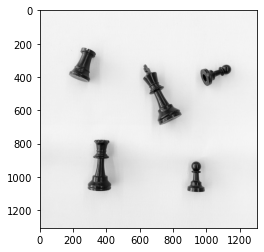

In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

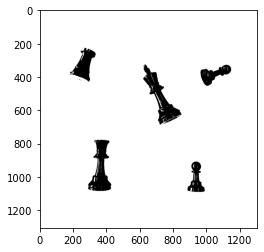

In [33]:
ret, thresh = cv2.threshold(gray, 127, 255, 0)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

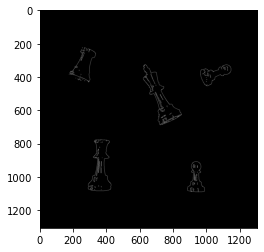

In [34]:
edge = cv2.Canny(thresh,128,255)
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(edge, kernel, iterations=1)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

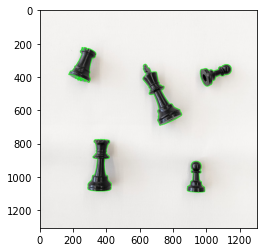

In [36]:
image_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.show()

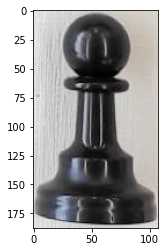

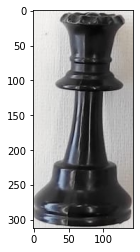

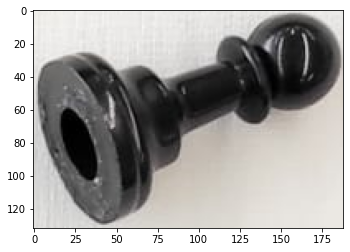

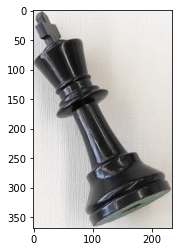

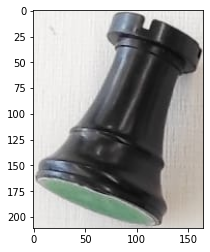

In [46]:
image_no = 0
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    im = image[y:y+h, x:x+w]
    
    if h > 100:
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        plt.show()
        cv2.imwrite('R' + str(image_no) + '.jpg',im)
        image_no += 1